# Web & Data Science – Data Mining Assignment

**Instructions for students:**
- This notebook provides the *structure* of the assignment.
- Cells marked with `# TODO` are for **you** to complete.
- You may add extra cells as needed (for checks, plots, notes, etc.).
- Make sure your final notebook is clean and readable (remove debugging prints).

**Required files (place in the same folder as this notebook):**
- `world_happiness.csv` – World Happiness Report subset
- `economic_freedom.csv` – Economic Freedom of the World dataset (Fraser Institute subset)
  

## 0. Setup & Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

pd.set_option('display.max_columns', None)
sns.set()
print('Libraries imported.')

Libraries imported.


## 1. Load the Datasets
In this section, you will:
- Load the **World Happiness** dataset
- Load the **Economic Freedom** dataset
- Inspect their basic structure

In [3]:
# TODO: Load the datasets from CSV files

happiness_path = 'world_happiness.csv'   # adjust if needed
freedom_path = 'economic_freedom.csv'    # adjust if needed

# YOUR CODE HERE
df_happiness = pd.read_csv(f"./assignment_support/{happiness_path}")
df_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,3.203,0.350,NaN,0.361,NaN,0.158,0.025
1,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [4]:
df_freedom = pd.read_csv(f"./assignment_support/{freedom_path}")
df_freedom.head()

,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2019,AGO,Angola,4.99,157,NaN,3.46,3.71,5.52,4.50
1,2019,ALB,Albania,7.72,33,7.64,5.52,9.76,8.53,7.17
2,2019,ARE,United Arab Emirates,7.05,72,5.40,5.81,8.93,8.49,6.63
3,2019,ARG,Argentina,5.30,153,6.34,5.46,3.37,5.85,5.48
4,2019,ARM,Armenia,7.51,47,7.71,5.86,9.34,8.11,6.54


### 1.1 Basic Inspection
Answer questions like:
- What are the column names?
- How many rows/columns does each dataset have?
- Are there obvious issues (weird values, extra columns)?

In [5]:
# TODO: Inspect the basic structure of both dataframes
# Use .info(), .describe(), .head(), .dtypes

# YOUR CODE HERE

#What are the column names?
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  155 non-null    int64  
 1   Country or region             155 non-null    object 
 2   Score                         155 non-null    float64
 3   GDP per capita                154 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       154 non-null    float64
 6   Freedom to make life choices  154 non-null    float64
 7   Generosity                    155 non-null    float64
 8   Perceptions of corruption     154 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.0+ KB


In [6]:
df_freedom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              165 non-null    int64  
 1   ISO_Code                          165 non-null    object 
 2   Countries                         165 non-null    object 
 3   Economic Freedom Summary Index    164 non-null    float64
 4   Rank                              165 non-null    int64  
 5   Size of Government                164 non-null    float64
 6   Legal System & Property Rights    164 non-null    float64
 7   Sound Money                       164 non-null    float64
 8   Freedom to trade internationally  164 non-null    float64
 9   Regulation                        165 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 13.0+ KB


In [7]:
# How many rows/columns does each dataset have?
df_happiness.shape

(155, 9)

In [8]:
# Are there obvious issues (weird values, extra columns)?
df_happiness.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,155.000000,155.000000,154.000000,153.000000,154.000000,154.000000,155.000000,154.000000
mean,78.935484,5.395348,0.899753,1.211667,0.724636,0.394052,0.183897,0.109721
std,44.994181,1.106983,0.398083,0.295503,0.241765,0.140050,0.094820,0.093972
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,40.500000,4.541000,0.586250,1.056000,0.552000,0.309500,0.108500,0.047000
50%,79.000000,5.373000,0.960000,1.274000,0.789000,0.417000,0.177000,0.085500
75%,117.500000,6.178000,1.221000,1.452000,0.881000,0.504750,0.246500,0.140750
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [9]:
df_freedom.describe()

,Year,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
count,165.0,164.000000,165.000000,164.000000,164.000000,164.000000,164.000000,165.000000
mean,2019.0,6.753476,82.769697,6.749329,5.294878,8.137500,7.168049,6.376727
std,0.0,1.050573,47.783126,1.119278,1.716158,1.627281,1.446906,1.114888
min,2019.0,2.560000,1.000000,3.700000,1.690000,0.740000,1.750000,2.270000
25%,2019.0,6.167500,42.000000,6.057500,4.090000,7.310000,6.332500,5.780000
50%,2019.0,6.850000,83.000000,6.685000,5.110000,8.625000,7.240000,6.590000
75%,2019.0,7.592500,123.000000,7.567500,6.355000,9.330000,8.320000,7.100000
max,2019.0,8.940000,165.000000,9.180000,8.930000,9.860000,9.660000,9.110000


---
# TASK 1 – Exploration & Cleaning (CRISP-DM: Data Understanding & Preparation)

In this task, you will:
1. Identify attribute types (numeric, categorical, etc.)
2. Explore data quality (missing values, outliers, inconsistencies)
3. Handle missing values
4. Handle outliers


## 1.1 Attribute Types
- Identify **numeric** and **categorical** attributes for each dataset.
  

In [10]:
# TODO: Inspect dtypes and decide attribute types (numeric or categorical) for both datasets

# YOUR CODE HERE
# Example logic to separate numeric vs non-numeric
df_happiness.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [11]:
df_freedom.dtypes

Year                                  int64
ISO_Code                             object
Countries                            object
Economic Freedom Summary Index      float64
Rank                                  int64
Size of Government                  float64
Legal System & Property Rights      float64
Sound Money                         float64
Freedom to trade internationally    float64
Regulation                          float64
dtype: object

## 1.2 & 1.3 Missing Values and Handling them
Use the slides on **Missing data – what can be done?**

Tasks:
- Count missing values per column
- Decide how to handle them (drop rows, drop columns, or impute)
- Apply your chosen strategy and justify it

In [12]:
# TODO: Explore missing values in both datasets

# YOUR CODE HERE
df_happiness.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  1
Social support                  2
Healthy life expectancy         1
Freedom to make life choices    1
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [13]:
df_happiness[df_happiness.isna().any(axis=1)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,3.203,0.350,NaN,0.361,NaN,0.158,0.025
29,103,Congo (Brazzaville),4.812,0.673,0.799,NaN,0.372,0.105,0.093
30,127,Congo (Kinshasa),4.418,0.094,NaN,0.357,0.269,0.212,0.053
34,20,Czech Republic,6.852,NaN,1.487,0.920,0.457,0.046,0.036
38,137,Egypt,4.166,0.913,1.039,0.644,0.241,0.076,NaN


In [14]:
df_freedom.isnull().sum()

Year                                0
ISO_Code                            0
Countries                           0
Economic Freedom Summary Index      1
Rank                                0
Size of Government                  1
Legal System & Property Rights      1
Sound Money                         1
Freedom to trade internationally    1
Regulation                          0
dtype: int64

In [15]:
df_freedom[df_freedom.isna().any(axis=1)]

,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,2019,AGO,Angola,4.99,157,NaN,3.46,3.71,5.52,4.50
5,2019,AUS,Australia,8.23,6,6.48,NaN,9.42,8.19,8.41
15,2019,BHS,"Bahamas, The",7.15,63,8.83,6.27,NaN,5.66,7.04
18,2019,BLZ,Belize,NaN,115,6.96,3.88,7.28,6.57,6.66
21,2019,BRB,Barbados,6.84,83,6.97,6.08,7.90,NaN,6.21


In [16]:
# TODO: Handle missing values
# Choose and justify your strategy (e.g., mean/median imputation, dropping rows/columns)
# You may want to create cleaned copies: happiness_clean, freedom_clean

# YOUR CODE HERE
happiness_clean = df_happiness.copy()
freedom_clean = df_freedom.copy()

happiness_numeric = df_happiness.select_dtypes(include=['int64', 'float64']).columns
happiness_numeric

for col in happiness_numeric:
    happiness_clean[col] = happiness_clean[col].fillna(happiness_clean[col].median())
happiness_clean[happiness_clean.isna().any(axis=1)]
# Strategy used here:
# For numeric columns: impute with median
# For categorical columns: impute with mode


# Numeric median imputation

# Categorical mode imputation


# drop the rows completely for missing values



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [17]:
freedom_numeric = df_freedom.select_dtypes(include=['int64', 'float64']).columns
freedom_numeric

for col in freedom_numeric:
    freedom_clean[col] = freedom_clean[col].fillna(freedom_clean[col].median())
freedom_clean[freedom_clean.isna().any(axis=1)]


,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation


In [18]:
# TODO: Explore missing values AFTER in both datasets

# YOUR CODE HERE
happiness_clean[happiness_clean.isna().any(axis=1)]
freedom_clean[freedom_clean.isna().any(axis=1)]

,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation


## 1.4 Outlier Detection

Tasks:
- Choose a few key numeric variables
- Use IQR or ±2 standard deviations to detect outliers
- Remove or clamp them (justify your choice)

In [19]:
# TODO: Detect outliers for selected numeric columns
# Hint: Use boxplots and/or IQR calculations

# YOUR CODE HERE
happiness_clean.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.935484,5.395348,0.900142,1.212471,0.725052,0.394200,0.183897,0.109565
std,44.994181,1.106983,0.396818,0.293663,0.241034,0.139607,0.094820,0.093686
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
25%,40.500000,4.541000,0.594500,1.057000,0.553000,0.310000,0.108500,0.047000
50%,79.000000,5.373000,0.960000,1.274000,0.789000,0.417000,0.177000,0.085500
75%,117.500000,6.178000,1.221000,1.447000,0.881000,0.502500,0.246500,0.140500
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [20]:
std = 0.093686
maxi = 2*std
maxi

0.187372

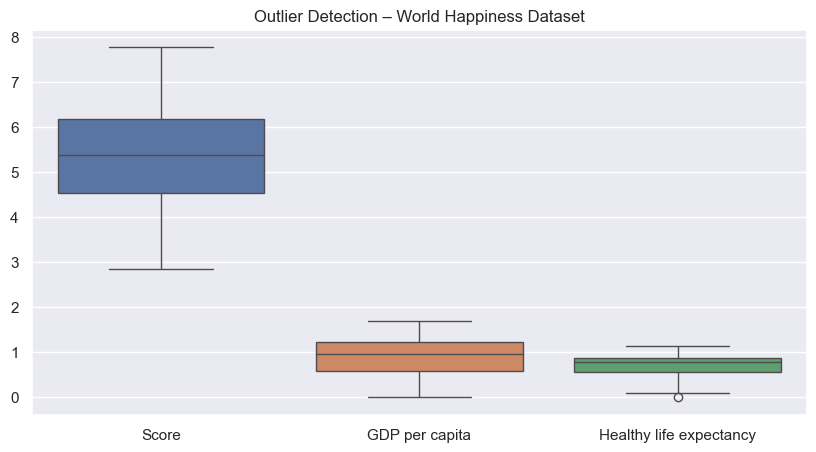

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_happiness_cols = [
    'Score',
    'GDP per capita',
    'Healthy life expectancy'
]

plt.figure(figsize=(10, 5))
sns.boxplot(data=happiness_clean[selected_happiness_cols])
plt.title('Outlier Detection – World Happiness Dataset')
plt.show()

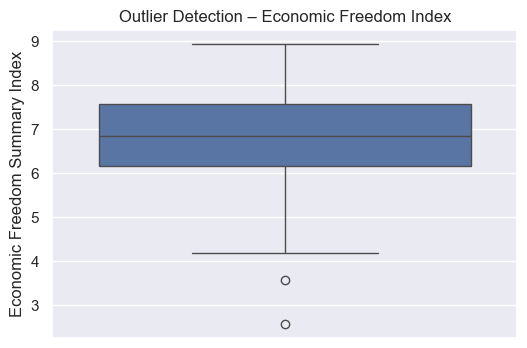

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=freedom_clean['Economic Freedom Summary Index'])
plt.title('Outlier Detection – Economic Freedom Index')
plt.show()

In [23]:
def clamp_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Values below lower_bound → replaced with lower_bound
    # Values above upper_bound → replaced with upper_bound
    df[column] = df[column].clip(lower_bound, upper_bound) 
    return df


In [24]:
# Apply to happiness dataset
for col in selected_happiness_cols:
    happiness_clean = clamp_outliers_iqr(happiness_clean, col)

# Apply to economic freedom dataset
freedom_clean = clamp_outliers_iqr(
    freedom_clean,
    'Economic Freedom Summary Index'
)
happiness_clean.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,3.203,0.350,1.274,0.361,0.417,0.158,0.025
1,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


In [25]:
happiness_clean[selected_happiness_cols].describe()

,Score,GDP per capita,Healthy life expectancy
count,155.000000,155.000000,155.000000
mean,5.395348,0.900142,0.725445
std,1.106983,0.396818,0.239890
min,2.853000,0.000000,0.061000
25%,4.541000,0.594500,0.553000
50%,5.373000,0.960000,0.789000
75%,6.178000,1.221000,0.881000
max,7.769000,1.684000,1.141000


In [26]:
freedom_clean['Economic Freedom Summary Index'].describe()

count    165.000000
mean       6.766121
std        1.008097
min        4.055000
25%        6.170000
50%        6.850000
75%        7.580000
max        8.940000
Name: Economic Freedom Summary Index, dtype: float64

In [27]:
# TODO: Apply your chosen outlier handling strategy
# You can create new dataframes without outliers if you want

# YOUR CODE HERE
happiness_no_outliers = happiness_clean.copy()
freedom_no_outliers = freedom_clean.copy()

# Example outline (fill in logic):


# TODO: Explore missing values AFTER in both datasets
happiness_no_outliers.isna().sum()


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [28]:
freedom_no_outliers.isna().sum()

Year                                0
ISO_Code                            0
Countries                           0
Economic Freedom Summary Index      0
Rank                                0
Size of Government                  0
Legal System & Property Rights      0
Sound Money                         0
Freedom to trade internationally    0
Regulation                          0
dtype: int64

---
# TASK 2 – Apply Data Mining Methods (Modelling & Evaluation)

Now that the data is cleaned and prepared, you will:
- Merge the two datasets
- Perform correlation analysis
- Apply unsupervised learning (clustering)
- Optionally apply a simple supervised method (classification)


## 2.1 Merge Datasets
Merge the cleaned Happiness and Economic Freedom dataframes on `Country`.


In [29]:
# TODO: Merge the two datasets

# YOUR CODE HERE

print(happiness_no_outliers.columns)
print(freedom_no_outliers.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Year', 'ISO_Code', 'Countries', 'Economic Freedom Summary Index',
       'Rank', 'Size of Government', 'Legal System & Property Rights',
       'Sound Money', 'Freedom to trade internationally', 'Regulation'],
      dtype='object')


In [30]:
merged_df = pd.merge(
    happiness_no_outliers,
    freedom_no_outliers,
    left_on="Country or region",
    right_on="Countries",
    how="inner"
)
merged_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2019,ALB,Albania,7.72,33,7.64,5.52,9.76,8.53,7.17
1,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,2019,DZA,Algeria,4.65,160,4.35,3.83,8.00,2.67,4.38
2,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,2019,ARG,Argentina,5.30,153,6.34,5.46,3.37,5.85,5.48
3,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064,2019,ARM,Armenia,7.51,47,7.71,5.86,9.34,8.11,6.54
4,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2019,AUT,Austria,7.80,27,5.38,8.56,9.30,8.61,7.12


## 2.2 Correlation Analysis
Use the merged dataset to:
- Compute a correlation matrix for selected numeric features
- Visualise it using a heatmap
- Interpret some of the strongest positive/negative correlations

In [31]:
# TODO: Compute and visualise correlation matrix

# YOUR CODE HERE
# compute correlations only on numeric columns, since correlation is undefined for categorical data.
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64'])
numeric_cols.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
0,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2019,7.72,33,7.64,5.52,9.76,8.53,7.17
1,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114,2019,4.65,160,4.35,3.83,8.00,2.67,4.38
2,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050,2019,5.30,153,6.34,5.46,3.37,5.85,5.48
3,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064,2019,7.51,47,7.71,5.86,9.34,8.11,6.54
4,10,7.246,1.376,1.475,1.016,0.532,0.244,0.226,2019,7.80,27,5.38,8.56,9.30,8.61,7.12


In [32]:
#  Compute a correlation matrix for selected numeric features
corr_matrix = numeric_cols.corr()
corr_matrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Economic Freedom Summary Index,Rank,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation
Overall rank,1.000000,-0.989839,-0.816200,-0.772467,-0.799440,-0.498713,-0.036479,-0.385815,NaN,-0.703313,0.735871,0.199276,-0.707422,-0.576031,-0.635438,-0.628724
Score,-0.989839,1.000000,0.807992,0.777987,0.792580,0.506375,0.072178,0.423453,NaN,0.695806,-0.725991,-0.213045,0.720491,0.561887,0.622656,0.624294
GDP per capita,-0.816200,0.807992,1.000000,0.795406,0.852190,0.380674,-0.077580,0.316323,NaN,0.681644,-0.717188,-0.344460,0.750087,0.567364,0.645986,0.615016
Social support,-0.772467,0.777987,0.795406,1.000000,0.750779,0.392798,-0.033581,0.217902,NaN,0.610244,-0.637765,-0.225092,0.656618,0.470097,0.579839,0.533045
Healthy life expectancy,-0.799440,0.792580,0.852190,0.750779,1.000000,0.374894,-0.065712,0.311673,NaN,0.718682,-0.744398,-0.281067,0.738712,0.598738,0.680478,0.645850
Freedom to make life choices,-0.498713,0.506375,0.380674,0.392798,0.374894,1.000000,0.260085,0.468598,NaN,0.427664,-0.433840,-0.031098,0.443609,0.329262,0.330658,0.365203
Generosity,-0.036479,0.072178,-0.077580,-0.033581,-0.065712,0.260085,1.000000,0.301544,NaN,0.094149,-0.083110,0.197241,0.069523,-0.020497,-0.004947,0.137990
Perceptions of corruption,-0.385815,0.423453,0.316323,0.217902,0.311673,0.468598,0.301544,1.000000,NaN,0.325654,-0.337254,-0.334352,0.503205,0.249567,0.234182,0.372006
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Economic Freedom Summary Index,-0.703313,0.695806,0.681644,0.610244,0.718682,0.427664,0.094149,0.325654,NaN,1.000000,-0.984533,0.097758,0.813876,0.775381,0.890374,0.878322


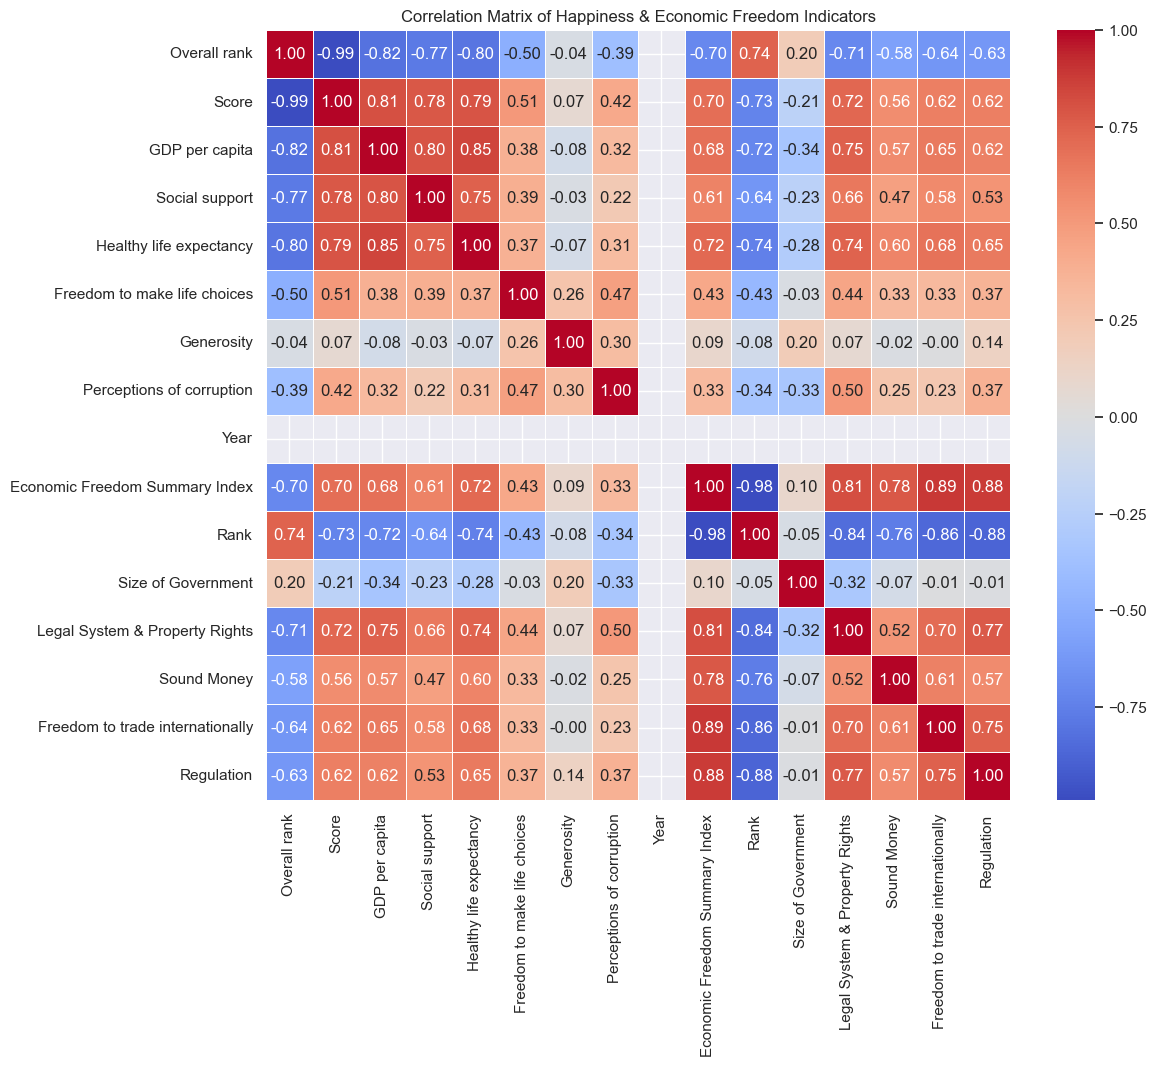

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix of Happiness & Economic Freedom Indicators")
plt.show()


## 2.3 Clustering (Unsupervised Learning)

Tasks:
- Select a subset of numeric features (e.g., Score, GDP_per_capita, EconomicFreedomIndex, LifeExpectancy)
- Normalise them (if not already done)
- Apply K-Means with k=3 and k=5
- Visualise the clusters (e.g., Score vs GDP, coloured by cluster)
- Interpret the clusters

In [34]:
# TODO: Apply K-Means clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# YOUR CODE HERE

feature = [
    "Score",
    "GDP per capita",
    "Healthy life expectancy",
    "Economic Freedom Summary Index"
]
 
X = merged_df[feature].copy()
X.head()

,Score,GDP per capita,Healthy life expectancy,Economic Freedom Summary Index
0,4.719,0.947,0.874,7.72
1,5.211,1.002,0.785,4.65
2,6.086,1.092,0.881,5.30
3,4.559,0.850,0.815,7.51
4,7.246,1.376,1.016,7.80


In [35]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled  #---> 0 to 12 ni vachee set kare 

array([[0.34912505, 0.56235154, 0.74227799, 0.77680525],
       [0.45411865, 0.59501188, 0.65637066, 0.10503282],
       [0.64084507, 0.64845606, 0.74903475, 0.24726477],
       [0.31498079, 0.50475059, 0.68532819, 0.73085339],
       [0.88839095, 0.81710214, 0.87934363, 0.79431072],
       [0.45347845, 0.61935867, 0.64092664, 0.43982495],
       [0.66495945, 0.8087886 , 0.73938224, 0.69584245],
       [0.29300043, 0.33372922, 0.5965251 , 0.3785558 ],
       [0.47801963, 0.63361045, 0.66023166, 0.41575492],
       [0.81946223, 0.80522565, 0.8503861 , 0.7571116 ],
       [0.38412292, 0.23337292, 0.28185328, 0.48358862],
       [0.42658984, 0.4827791 , 0.48166023, 0.58424508],
       [0.57533077, 0.4608076 , 0.58011583, 0.43763676],
       [0.49146394, 0.5611639 , 0.71428571, 0.58862144],
       [0.08642766, 0.61817102, 0.41795367, 0.60612691],
       [0.68651302, 0.59619952, 0.67277992, 0.52954048],
       [0.41143833, 0.64845606, 0.68532819, 0.72428884],
       [0.32095604, 0.19655582,

In [40]:
# KMeans with k=3
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df['cluster_k3'] = kmeans3.fit_predict(X_scaled)

# KMeans with k=5
kmeans5 = KMeans(n_clusters=5, random_state=42, n_init=10)
merged_df['cluster_k5'] = kmeans5.fit_predict(X_scaled)

merged_df[['Country or region', 'cluster_k3', 'cluster_k5']].tail()


,Country or region,cluster_k3,cluster_k5
124,United States,1,3
125,Uruguay,1,0
126,Vietnam,0,4
127,Zambia,2,1
128,Zimbabwe,2,2


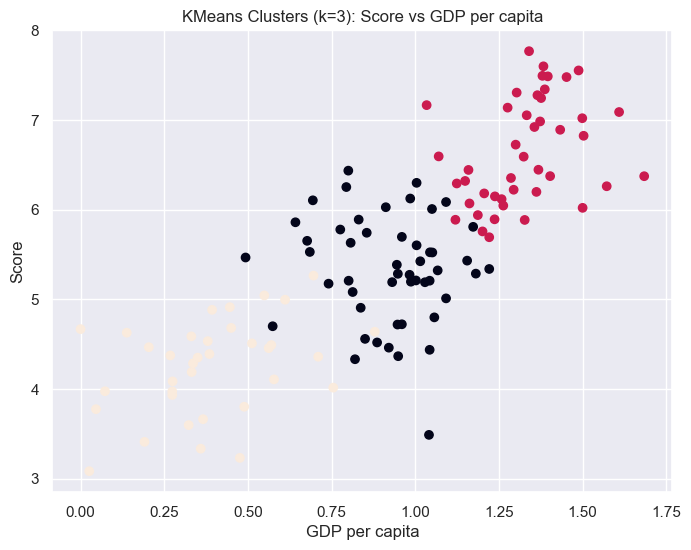

In [43]:
# TODO: Visualise clusters (e.g., Score vs GDP, coloured by cluster)

# YOUR CODE HERE
# x_col = ''  # e.g., use column names from the dataset
# y_col = ''  # e.g., use column names from the dataset

x_col = 'GDP per capita'
y_col = 'Score'

plt.figure(figsize=(8, 6))
plt.scatter(merged_df[x_col], merged_df[y_col], c=merged_df['cluster_k3'])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('KMeans Clusters (k=3): Score vs GDP per capita')
plt.show()

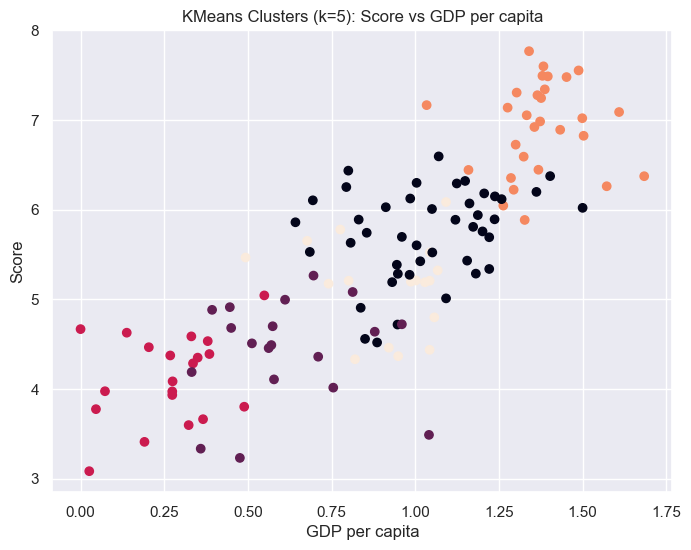

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_df[x_col], merged_df[y_col], c=merged_df['cluster_k5'])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('KMeans Clusters (k=5): Score vs GDP per capita')
plt.show()

✏️ **Short Answer:**
- How would you describe each cluster (high GDP & high happiness, etc.)?
- Do clusters correspond to specific regions/continents?


*(Write your answer here.)*